In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data_berat_badan.csv", sep=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   106 non-null    float64
 1   Suhu     106 non-null    int64  
 2   Tanggal  106 non-null    object 
 3   Waktu    106 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


In [4]:
data["Tanggal"]

0      02-Apr
1      03-Apr
2      03-Apr
3      03-Apr
4      03-Apr
        ...  
101    02-May
102    03-May
103    03-May
104    05-May
105    06-May
Name: Tanggal, Length: 106, dtype: object

<AxesSubplot:>

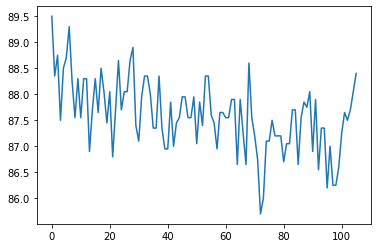

In [5]:
data["Weight"].plot()

<AxesSubplot:>

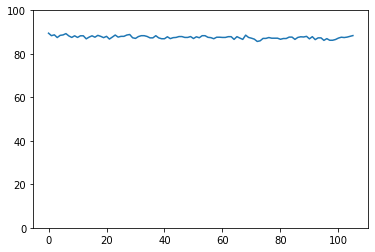

In [6]:
data["Weight"].plot(ylim=(0,100))

In [7]:
data["Weight"].mean()

87.60283018867922

In [8]:
print("Awal =",data["Weight"][0])
print("Akhir =",data["Weight"][len(data)-1])

Awal = 89.5
Akhir = 88.4


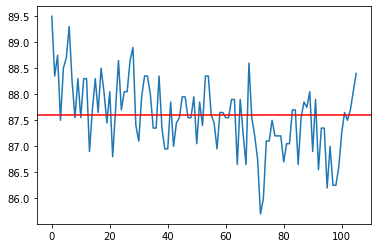

In [9]:
import matplotlib.pyplot as plt

plt.plot(data["Weight"])
plt.axhline(data["Weight"].mean(),color='r')

In [10]:
#https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f
import numpy as np

lm = np.polyfit(data.index,data.Weight,1)
f = np.poly1d(lm)
data.insert(4,"y_hat",f(data.index))

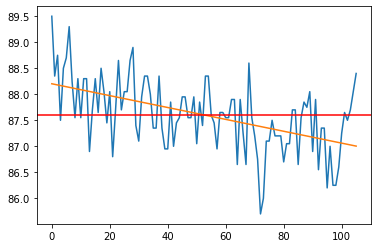

In [11]:
plt.plot(data["Weight"])
plt.plot(data["y_hat"])
plt.axhline(data["Weight"].mean(),color='r')

In [12]:
print("Fungsi regresinya adalah y = %.2fx + %.2f" % (lm[0],lm[1]))

Fungsi regresinya adalah y = -0.01x + 88.20


Artinya setiap satu kali ngukur (bukan tiap hari ya, karena sehari bisa diukur beberapa kali), berkurangnya hanya sekitar 0.01 kg

In [13]:
#dibagi jadi 4 kategori :
# A = sebelum sahur
# B = sesudah sahur
# C = sebelum buka
# D = sesudah buka
# yang lain disesuaikan dengan kategori tersebut

kategori = pd.read_csv("data_kategori.csv",sep=";")
data = data.merge(kategori, on=["Tanggal","Waktu"])

In [14]:
data

,Weight,Suhu,Tanggal,Waktu,y_hat,Kategori
0,89.50,28,02-Apr,17.19.01,88.202090,C
1,88.35,27,03-Apr,03.37.01,88.190675,A
2,88.75,27,03-Apr,04.09.27,88.179261,B
3,87.50,27,03-Apr,17.55.12,88.167846,C
4,88.50,27,03-Apr,18.19.42,88.156432,D
...,...,...,...,...,...,...
101,87.65,24,02-May,07.10.25,87.049229,B
102,87.50,27,03-May,08.48.58,87.037814,B
103,87.70,26,03-May,20.44.31,87.026400,D
104,88.05,26,05-May,08.20.05,87.014985,B


In [15]:
info = {"Data":[],"Awal":[],"Akhir":[],"Mean":[],"Slope":[],"Intercept":[]}

grup = data.groupby("Kategori")
group_list = ["A","B","C","D"]
for g in group_list:
    gdf = grup.get_group(g)
    gdf.index = range(len(gdf))
    info["Data"].append(len(gdf))
    info["Awal"].append(gdf["Weight"][0])
    info["Akhir"].append(gdf["Weight"][len(gdf)-1])
    info["Mean"].append(gdf["Weight"].mean())
    lm = np.polyfit(gdf.index,gdf.Weight,1)
    f = np.poly1d(lm)
    gdf.insert(6,"y_group_hat",f(gdf.index))
    data = data.merge(gdf, how="left")
    info["Slope"].append(lm[0])
    info["Intercept"].append(lm[1])

In [16]:
info

{'Data': [19, 32, 33, 22],
 'Awal': [88.35, 88.75, 89.5, 88.5],
 'Akhir': [86.9, 88.4, 86.6, 87.7],
 'Mean': [87.7, 87.953125, 87.12575757575758, 87.725],
 'Slope': [-0.05614035087719474,
  -0.035923753665686745,
  -0.04720922459892846,
  -0.04305477131563834],
 'Intercept': [88.20526315789475,
  88.50994318181814,
  87.88110516934043,
  88.17707509881417]}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

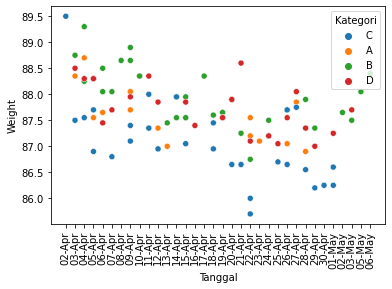

In [28]:
import seaborn as sns

sns.scatterplot(data=data,x="Tanggal",y="Weight",hue="Kategori")
plt.xticks(rotation=90)

In [29]:
A = grup.get_group("A")
B = grup.get_group("B")
C = grup.get_group("C")
D = grup.get_group("D")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight       106 non-null    float64
 1   Suhu         106 non-null    int64  
 2   Tanggal      106 non-null    object 
 3   Waktu        106 non-null    object 
 4   y_hat        106 non-null    float64
 5   Kategori     106 non-null    object 
 6   y_group_hat  19 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.6+ KB
